# Assignment 3 - Clustering and Neural Networks

## Student Details

**`Name`** Montgomery Gole, Viral Bankimbhai Thakar

**`Email`** mgole@torontomu.ca, vthakar@torontomu.ca

**`Student ID`** 501156495, 501213983

In [1]:
%load_ext autoreload
%autoreload 2

## Question 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from utils import styled_print, plot_scatter_plot

### Part B -  Clustering With Python

#### Part 1 - Use non hierarchical k-means (k=3) and show clusters’ memberships of the above dataset. 

In [3]:
# Initialize the dataset
data = np.array(
    [[8, 4], [5, 4], [2, 4], [2, 6], [2, 8], [8, 6]]
)

# Dataframe of the dataset
data_df = pd.DataFrame.from_dict({
    "RID": [1, 2, 3, 4, 5, 6],
    "Dimension 1": [8, 5, 2, 2, 2, 8],
    "Dimension 2": [4, 4, 4, 6, 8, 6]
})

# Setting RID as Index Column
# data_df = data_df.set_index('RID')

data_df.head(10)

,RID,Dimension 1,Dimension 2
0,1,8,4
1,2,5,4
2,3,2,4
3,4,2,6
4,5,2,8
5,6,8,6


In [4]:
# Function to create Cluster Map for Better Visualization and Filtering
def create_cluster_map(data, model):
    cluster_map = pd.DataFrame()
    cluster_map['ClusterID'] = model.labels_
    cluster_map = pd.concat([data, cluster_map], axis=1)
    return cluster_map

def get_centroid(data, kmeans):
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)
    return centroids

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0, init='random', n_init=1).fit(data_df.drop('RID', axis=1))
cluster_map = create_cluster_map(data_df, kmeans)

styled_print(f"Cluster Map from Kmeans with Random Cluster Initialization", header=True)
print(cluster_map.head(10))

styled_print(f"Cluster Centroid from Kmeans with Random Cluster Initialization", header=True)
print(get_centroid(data_df.drop('RID', axis=1), kmeans).head(10))

› Cluster Map from Kmeans with Random Cluster Initialization
   RID  Dimension 1  Dimension 2  ClusterID
0    1            8            4          0
1    2            5            4          2
2    3            2            4          1
3    4            2            6          1
4    5            2            8          1
5    6            8            6          0
› Cluster Centroid from Kmeans with Random Cluster Initialization
   Dimension 1  Dimension 2
0          8.0          5.0
1          2.0          6.0
2          5.0          4.0


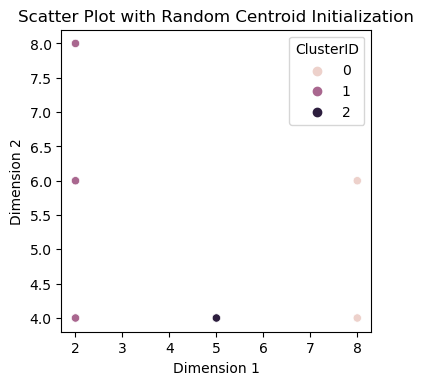

In [6]:
plot_scatter_plot(
    df=cluster_map, 
    x="Dimension 1", 
    y="Dimension 2", 
    hue='ClusterID',
    title="Scatter Plot with Random Centroid Initialization", 
    figsize=(4, 4), 
    dpi=100)

**As we can see from the above table that it is not matching the table we got from the manual clustering in Part A.** The reason is that in Part A we selected RID 1, 3 and 5 as initial centroid while here we are selecting random samples as initial centroid. Let's try selecting RID 1, 3 and 5 as initial centroids to verify our manual clustering in Part A. 

In [7]:
init_centroids = [[8, 4], [2, 4], [2, 8]]
kmeans = KMeans(n_clusters=3, random_state=0, init=init_centroids, n_init=1).fit(data_df.drop('RID', axis=1))
cluster_map = create_cluster_map(data_df, kmeans)

styled_print(f"Cluster Map from Kmeans with Proposed Centroid Initialization", header=True)
print(cluster_map.head(10))

styled_print(f"Cluster Centroid from Kmeans with Proposed Centroid Initialization", header=True)
print(get_centroid(data_df.drop('RID', axis=1), kmeans).head(10))

› Cluster Map from Kmeans with Proposed Centroid Initialization
   RID  Dimension 1  Dimension 2  ClusterID
0    1            8            4          0
1    2            5            4          0
2    3            2            4          1
3    4            2            6          1
4    5            2            8          2
5    6            8            6          0
› Cluster Centroid from Kmeans with Proposed Centroid Initialization
   Dimension 1  Dimension 2
0          7.0     4.666667
1          2.0     5.000000
2          2.0     8.000000


Again here the results are almost same apart from one case. In our manual clustering sample with RID 4 was part of the same cluster as RID 5 i.e. Cluster ID 2. Here RID 3 and RID 4 are part of same cluster with Cluster ID 1. If you remember the shortest distance of sample with RID 4 was same for Cluster ID 1 and Cluster ID 2. In the manual calculation we randomly selected Cluster ID 2 and that is why sample with RID 4 landed in the same cluster as the sample with RID 5. If we have selected Cluster ID 1 at that stage, we would have got the same result as mentioned in this table.

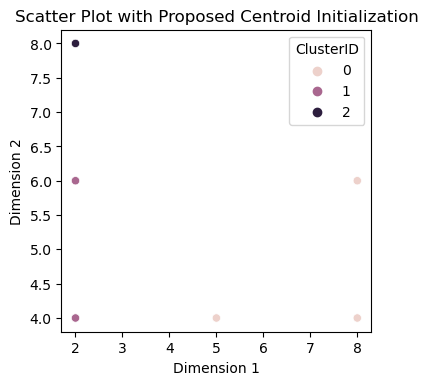

In [8]:
plot_scatter_plot(
    df=cluster_map, 
    x="Dimension 1", 
    y="Dimension 2", 
    hue='ClusterID',
    title="Scatter Plot with Proposed Centroid Initialization", 
    figsize=(4, 4), 
    dpi=100)

#### Part 2 - Use Hierarchical Clustering - Agglomerative Clustering.

In [9]:
agglomerative = AgglomerativeClustering(n_clusters=None, distance_threshold=0, metric='euclidean', linkage = 'complete').fit(data_df.drop('RID', axis=1))

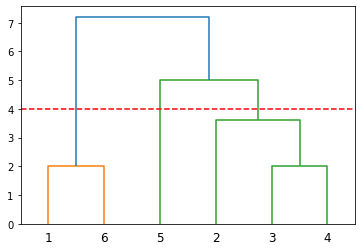

In [10]:
# Source of the function is https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(agglomerative, truncate_mode="level", p=5, labels=[1, 2, 3, 4, 5, 6])
plt.axhline(y = 4, color = 'r', linestyle = '--')

As we can see that heirarchical clustering creates 6 clusters at the beginning and gradually converges to 1 cluster. Based on different threshold we can have different number of clusters. For example if we choose distance threshold to be 4 (indicated with red line), we have total 3 clusters where data samples with RID 1 and 6 are part of one cluster. Data samples with RID 2, 3, and 4 are part of second cluster. The data sample with RID 5 is part of third cluster. 

#### Clustering on Restaurants Table from Assignment 1 (For Bonus Marks)

In [11]:
csv_path = "../Assignment - 1 - Database Design/data/restaurants.csv"
df = pd.read_csv(csv_path)
df.head(5)

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700


First let's try to cluster restaurants based on `score` and `ratings` features. Let's remove the Null values.

In [12]:
data_df = df.dropna(axis=0, subset=["score", "ratings"])
data_df.head()

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700
6,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440
13,14,51,Panera (521 Fieldstown Road),4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",$,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247
15,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",$$$,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950
18,19,30,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170


In [13]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_df[["score", "ratings"]]), columns = data_df[["score", "ratings"]].columns)
data_scaled.head()

,score,ratings
0,0.466403,-0.730465
1,0.466403,-0.164009
2,0.130871,-0.426513
3,1.472997,-0.758097
4,1.137466,-0.371249


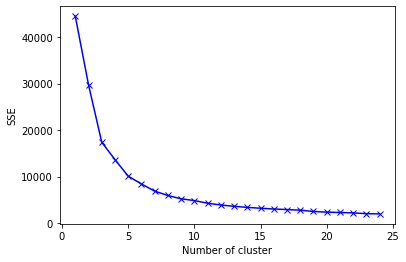

In [14]:
sse = {} 
for k in range(1, 25):
    kmeans = KMeans(n_init='auto', n_clusters=k, init='random', random_state=0).fit(data_scaled)
    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

From Elbow Plot we are getting k = 3. Let's verify same for Silhouette Score.

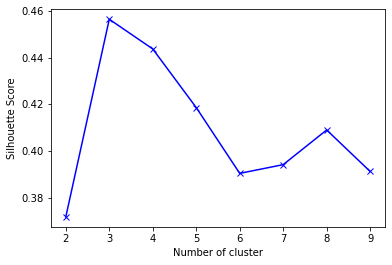

In [15]:
sc = {} 
for k in range(2, 10):
    kmeans = KMeans(n_init='auto', n_clusters=k, init='random', random_state=0).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

# Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

As we can see that the Silhouette Score bumps up at k = 3. We will use k = 3 for our model development. 

In [16]:
kmeans = KMeans(n_init='auto', n_clusters = 3, random_state = 1).fit(data_scaled)

data_df['KMeans_Labels'] = kmeans.predict(data_scaled)
data_scaled['KMeans_Labels'] = kmeans.predict(data_scaled)

<ipython-input-16-99eca3b3d76b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['KMeans_Labels'] = kmeans.predict(data_scaled)


In [17]:
data_df.head(10)

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,KMeans_Labels
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,0
6,7,27,Jinsei Sushi,4.7,63.0,"Sushi, Asian, Japanese",$,"1830 29th Ave S, Birmingham, AL, 35209",35209,33.480440,-86.790440,0
13,14,51,Panera (521 Fieldstown Road),4.6,44.0,"Breakfast and Brunch, salad, Sandwich, Family ...",$,"521 Fieldstown Road, Gardendale, AL, 35071",35071,33.651407,-86.819247,0
15,16,88,Jeni's Splendid Ice Cream (Pepper Place),5.0,20.0,"Ice Cream &amp; Frozen Yogurt, Comfort Food, D...",$$$,"219 29th St S, Birmingham, AL, 35233",35233,33.516600,-86.789950,0
18,19,30,Falafel Cafe,4.9,48.0,"Middle Eastern, Mediterranean, Vegetarian, Gre...",$,"401 19th St S, Birmingham, AL, 35233",35233,33.508353,-86.803170,0
19,20,40,MrBeast Burger (838 Odum Road),3.7,19.0,"American, Burgers, Sandwich",$$,"838 Odum Road, Gardendale, AL, 35071",35071,33.645480,-86.826260,2
26,27,113,Ruscelli's Food Truck at Mojo Pub,4.7,100.0,"Italian, Exclusive to Eats",$,"2801 7th Ave S, Birmingham, AL, 35233",35233,33.511130,-86.788388,0
34,35,80,Starbucks (Hwy 11 and Avenue W),4.6,21.0,"Bakery, Breakfast and Brunch, Cafe, Coffee &am...",$,"2401 Crossplex Boulevard 101, Birmingham, AL, ...",35208,33.497944,-86.874391,0
35,36,77,"Moe's Southwest Grill (655 Fieldstown Road, Su...",4.8,24.0,"Mexican, Fast Food, Salads, Healthy",$,"655 Fieldstown Road, Gardendale, AL, 35071",35071,33.649758,-86.823942,0
36,37,66,La Tia Paisa Taco Shop,4.3,24.0,"Mexican, Breakfast and Brunch, Burritos",$$,"406 W Valley Ave, Homewood, AL, 35209",35209,33.470750,-86.826140,2


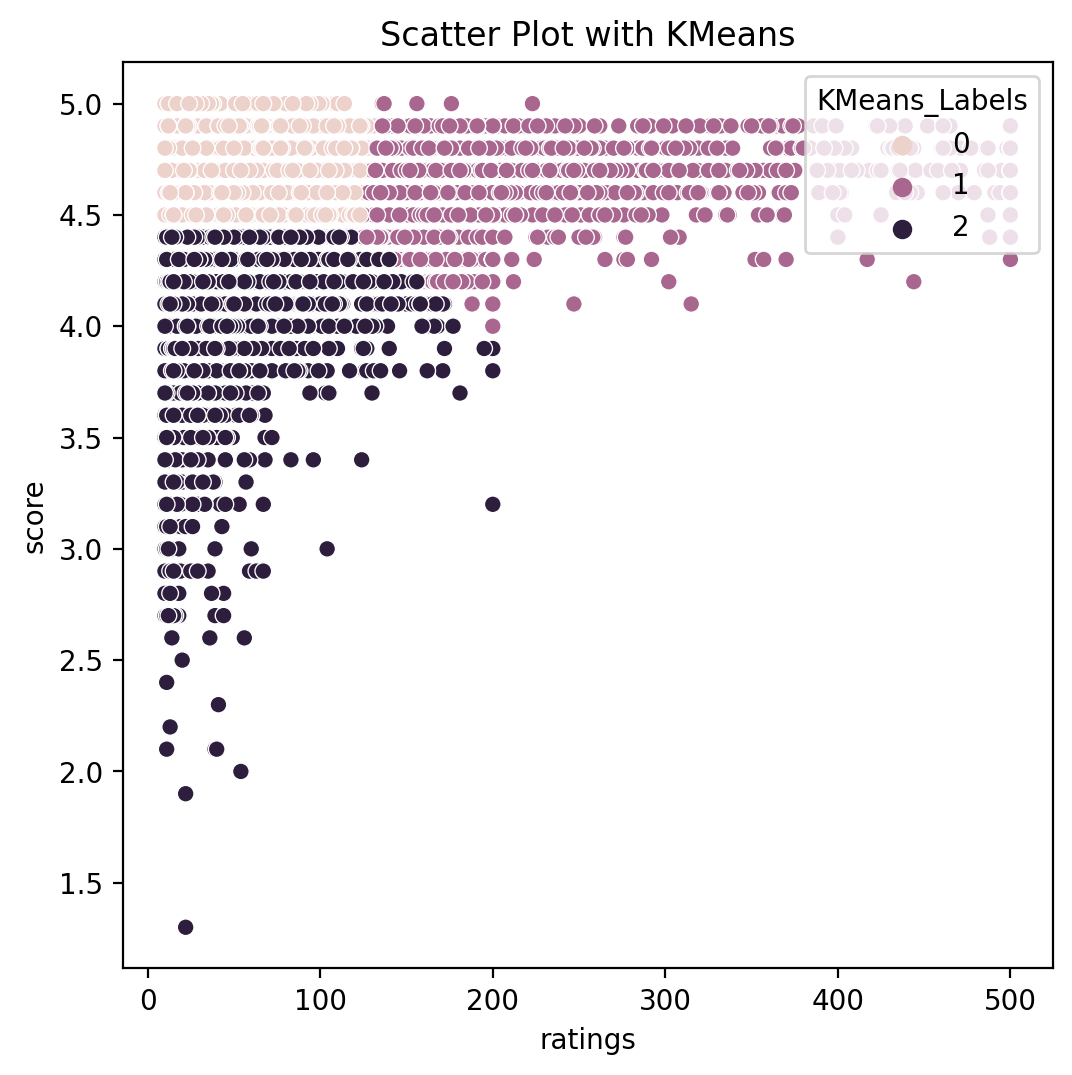

In [18]:
plot_scatter_plot(
    df=data_df, 
    x="ratings", 
    y="score", 
    hue='KMeans_Labels',
    title="Scatter Plot with KMeans", 
    figsize=(6, 6), 
    dpi=200)

As we can see the Kmeans is able to group reastaurant in three groups:
1. Restaurants with Higher Score and Higher Number of Ratings are part of Cluster 1.
2. Restaurant with Lower Score and Lower Number of Ratings are part of Cluster 2.
3. Restaurats with Higher Score but Lower Number of Ratings are part of Cluster 0. 

This is so interesting information because cluster 0 highlights the restaurants which might be new in area but serve really good food and people might be liking them a lot. It would be great for UberEats to recommend those restaurants to customers.  

## Question 2

### Section A- Supervised Machine Learning

**SOME OF OUR CODE PIECES ARE SAME AS OUR ASSIGNMENT 2 SOLUTION TO AVOID DUPLICATE CODE**

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from utils import styled_print, download_data, read_and_clean_data, \
     plot_box_plot_hist_plot, plot_count_plot, discrete_to_target_plot, \
     continuous_to_target_plot, correlation_analysis, traditional_feature_importance

In [20]:
cleveland_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [21]:
headers = {
    0: "age",
    1: "sex",
    2: "cp",
    3: "trestbps",
    4: "chol",
    5: "fbs",
    6: "restecg",
    7: "thalach",
    8: "exang",
    9: "oldpeak",
    10: "slope",
    11: "ca",
    12: "thal",
    13: "target"
}

In [22]:
styled_print(f"Heart Disease Data Analysis", header=True)
styled_print(f"Extracting Data From {cleveland_url}")
cleveland_file = download_data(cleveland_url, path_to_download="./data")
cleveland_df = read_and_clean_data(cleveland_file, header=headers.values())

› Heart Disease Data Analysis
    Extracting Data From http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data


In [23]:
styled_print(f"Cleveland Dataframe Info", header=True)
cleveland_df.info()

› Cleveland Dataframe Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


#### Dataset Understanding and Observations

Here are some observations from the `heart-disease.names` file regarding the features.

1. `age` is a `continuous` feature which indicates the age of the person in years. 
2. `sex` is a `binary categorical` feature indicating sex information.
    - 1 : male
    - 0 : female
3. `cp` is a `categorical` feature which indicates the type of chest pain.
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. `trestbps` is a `continuous` feature indicating resting blood pressure (in mm Hg on admission to the hospital).
5. `chol` is a `continuous` feature indicating serum cholestoral in mg/dl.
6. `fbs` is a `binary categorical` feature indicating fasting blood sugar > 120 mg/dl.
    - 1 : true
    - 0 : false
7. `restecg` is a `categorical` feature indicating resting electrocardiographic results.
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. `thalach` is a `continuous` feature indicating maximum heart rate achieved.
9. `exang` is a `binary categorical` feature indicating exercise induced angina.
    - 1 : yes
    - 0 : no
10. `oldpeak` is a `continuos` feature indicating ST depression induced by exercise relative to rest.
11. `slope` is a `categorical`feature indicating the slope of the peak exercise ST segment.
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. `ca` is a `categorical` feature indicating number of major vessels (0-3) colored by flourosopy.
13. `thal` is a `categorical` feature.
    - 3 : normal
    - 6 : fixed defect
    - 7 : reversable defect
14. `target` is a `categorical` feature (target) indicating the diagnosis of heart disease (angiographic disease status)

**Two main observations:** 
1. As all of over categorical features are already numerically encoded we will treat them as discrete feature and not traditional categorical features. 
2. As provided in `heart-disease.names` file:

    ```The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).```

    So Initially We can convert the `target` into two categories 
    - 0: Absence of Heart disease
    - 1: Presence of Heart disease (Combine current categories 1, 2, 3, and 4)

In [24]:
categorical_columns = ["cp", "restecg", "slope", "thal", "ca"]
binary_columns = ["sex", "fbs", "exang"]

continuous_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
discrete_columns = categorical_columns + binary_columns
target_column = ["target"]

In [25]:
# Creating Copy of Dataframe for Data Processing
data_df = cleveland_df.copy()

#### Data Preprocessing and Exploratory Data Analysis

##### Preprocessing Target

In [26]:
# Check unique values for target and its percentage
data_df["target"].value_counts(dropna=False)

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

In [27]:
# Mapping target 2, 3, and 4 to 1. 
target_mapping = {2: 1, 3: 1, 4: 1}
data_df["target"] = data_df["target"].apply(lambda x: 1 if x == 2 or x == 3 or x == 4 else x)

In [28]:
# Check unique values for target and its percentage
data_df["target"].value_counts(dropna=False)

0    164
1    139
Name: target, dtype: int64

##### Splitting The Data

To split the data we are using `train_test_split()` method from `sklearn's` `model_selection` module. The splitting is based on the following parameters:
1. `test_size` is set to `0.2`. It will makes sure that we have 20% of our data for testing and rest 80% of data we can use for training and/or cross-validation.
2. `random_state` is set to `10`. We can set it to any fix number as it will help us in reproducibility of our experiment.
3. `stratify` is set to `target` feature. This will ensure the stratified sampling process. In simple words it will make sure that the distribution of Heart Disease and Non-Heart Disease patient remains as it is even after the split. Refer [this](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators-with-stratification-based-on-class-labels) for further details. 
4. `shuffle` is set to `True`.

In [29]:
train_df, test_df = train_test_split(data_df, test_size=.2, random_state=10, stratify=data_df["target"], shuffle=True)

Let's check how stratify sampling make sure that the distribution of data is balance after the split too. 

In [30]:
# Check unique values for target and its percentage
data_df["target"].value_counts(normalize=True)*100

0    54.125413
1    45.874587
Name: target, dtype: float64

In [31]:
# Check unique values for target and its percentage
train_df["target"].value_counts(normalize=True)*100

0    54.132231
1    45.867769
Name: target, dtype: float64

In [32]:
# Check unique values for target and its percentage
test_df["target"].value_counts(normalize=True)*100

0    54.098361
1    45.901639
Name: target, dtype: float64

As we can see that in both training and testing dataset, `54%` of data comes from the `label 0` i.e. Absence of Heart Disease while `46%` of data comes from the `label 1` i.e. Presence of Heart Disease. **These percentages matches the percentage distribution in original dataset.**

In [33]:
styled_print(f"There are {train_df.shape[0]} data points for training and {test_df.shape[0]} data points for testing.", header=True)

› There are 242 data points for training and 61 data points for testing.


**Why are we splitting data first before any exploratory data analysis or even treating missing values??**

Our reasoning to split the data at the very beginning of workflow is to make sure that we can ensure that there is no data leak issues.
For example, we usually use median value to replace the missing values in a continuous feature. We want to make sure that the median value which we calculate comes only from the training set and we apply it to test set. This way we can gurantee that even in data preprocessing we are not introducing any direct or indirect data leak issues. 

This fact is usually ignored in many books and material but in practice it is heavily been used. 


##### Missing Value Treatment

In [34]:
train_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          3
thal        2
target      0
dtype: int64

In [35]:
test_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          1
thal        0
target      0
dtype: int64

As we have a very small number of missing values in the training and test dataset, it would be better to drop those rows instead of trying to figure out strategy to replace them. 

In [36]:
train_df = train_df.dropna()
test_df = test_df.dropna()

Let's verify that all the rows with missing values are dropped. 

In [37]:
train_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [38]:
test_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [39]:
styled_print(f"There are {train_df.shape[0]} data points for training and {test_df.shape[0]} data points for testing.")

    There are 237 data points for training and 60 data points for testing.


#### Model Creation

We will follow these steps to create the `BASELINE` model:
- Prepare the data for modeling.
    - Create X and Y - (x_train, y_train) and (x_test, y_test)
    - Scale Continuous Features using Min-Max Scaler.
    - Scale Discrete Features using Min-Max Scaler.
- Build the `BASELINE` model on the train data.
    - Create `Losgistic Regression` Model
- Build the `IMPROVED` model on the train data.
    - Create `Neural Network` Model
- Test the model on the test set.
    - Calculate $MAE$ score to measure the performance of the model.
    - Calculate $Confusion \ Matrix$.
    - Calculate $Classification \ Report$ to get Precision, Recall and F1 Score.
- Merge Target Label and Map it to Binary Lable
    - Repeat previous steps to perform model analysis. 

Here `BASELINE` model means
    - We will use all features to create the model.

Later we will improve the model based on the learnings from the `BASELINE` model.

##### Prepare the data for modeling

In [40]:
y_train = train_df[target_column[0]].copy()
x_train = train_df.drop(target_column[0], axis=1)

In [41]:
y_test = test_df[target_column[0]].copy()
x_test = test_df.drop(target_column[0], axis=1)

In [42]:
x_train_copy = x_train.copy(deep=True).reset_index(drop=True)
x_test_copy = x_test.copy(deep=True).reset_index(drop=True)

In [43]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train),columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

In [44]:
x_train_copy.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0
1,48.0,1.0,4.0,130.0,256.0,1.0,2.0,150.0,1.0,0.0,1.0,2.0,7.0
2,50.0,1.0,4.0,150.0,243.0,0.0,2.0,128.0,0.0,2.6,2.0,0.0,7.0
3,63.0,0.0,2.0,140.0,195.0,0.0,0.0,179.0,0.0,0.0,1.0,2.0,3.0
4,49.0,0.0,2.0,134.0,271.0,0.0,0.0,162.0,0.0,0.0,2.0,0.0,3.0
5,57.0,1.0,4.0,152.0,274.0,0.0,0.0,88.0,1.0,1.2,2.0,1.0,7.0
6,60.0,0.0,4.0,158.0,305.0,0.0,2.0,161.0,0.0,0.0,1.0,0.0,3.0
7,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0
8,43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0
9,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0


In [45]:
x_train.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,0.0,1.000000,0.528302,0.641553,0.0,1.0,0.633588,0.0,0.714286,0.5,1.000000,1.0
1,0.395833,1.0,1.000000,0.339623,0.296804,1.0,1.0,0.603053,1.0,0.000000,0.0,0.666667,1.0
2,0.437500,1.0,1.000000,0.528302,0.267123,0.0,1.0,0.435115,0.0,0.464286,0.5,0.000000,1.0
3,0.708333,0.0,0.333333,0.433962,0.157534,0.0,0.0,0.824427,0.0,0.000000,0.0,0.666667,0.0
4,0.416667,0.0,0.333333,0.377358,0.331050,0.0,0.0,0.694656,0.0,0.000000,0.5,0.000000,0.0
5,0.583333,1.0,1.000000,0.547170,0.337900,0.0,0.0,0.129771,1.0,0.214286,0.5,0.333333,1.0
6,0.645833,0.0,1.000000,0.603774,0.408676,0.0,1.0,0.687023,0.0,0.000000,0.0,0.000000,0.0
7,0.750000,0.0,0.666667,0.433962,0.664384,1.0,1.0,0.656489,0.0,0.142857,0.0,0.333333,0.0
8,0.291667,0.0,0.666667,0.264151,0.198630,0.0,0.0,0.717557,0.0,0.035714,0.5,0.000000,0.0
9,0.666667,1.0,1.000000,0.415094,0.091324,0.0,1.0,0.412214,1.0,0.642857,0.5,0.333333,0.0


In [46]:
x_test_copy.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,41.0,0.0,3.0,112.0,268.0,0.0,2.0,172.0,1.0,0.0,1.0,0.0,3.0
1,64.0,1.0,4.0,120.0,246.0,0.0,2.0,96.0,1.0,2.2,3.0,1.0,3.0
2,43.0,1.0,4.0,120.0,177.0,0.0,2.0,120.0,1.0,2.5,2.0,0.0,7.0
3,35.0,1.0,4.0,126.0,282.0,0.0,2.0,156.0,1.0,0.0,1.0,0.0,7.0
4,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0
5,54.0,1.0,3.0,125.0,273.0,0.0,2.0,152.0,0.0,0.5,3.0,1.0,3.0
6,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0
7,63.0,0.0,3.0,135.0,252.0,0.0,2.0,172.0,0.0,0.0,1.0,0.0,3.0
8,41.0,0.0,2.0,105.0,198.0,0.0,0.0,168.0,0.0,0.0,1.0,1.0,3.0
9,46.0,1.0,4.0,120.0,249.0,0.0,2.0,144.0,0.0,0.8,1.0,0.0,7.0


In [47]:
x_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.250000,0.0,0.666667,0.169811,0.324201,0.0,1.0,0.770992,1.0,0.000000,0.0,0.000000,0.00
1,0.729167,1.0,1.000000,0.245283,0.273973,0.0,1.0,0.190840,1.0,0.392857,1.0,0.333333,0.00
2,0.291667,1.0,1.000000,0.245283,0.116438,0.0,1.0,0.374046,1.0,0.446429,0.5,0.000000,1.00
3,0.125000,1.0,1.000000,0.301887,0.356164,0.0,1.0,0.648855,1.0,0.000000,0.0,0.000000,1.00
4,0.562500,1.0,0.333333,0.339623,0.216895,0.0,1.0,0.702290,0.0,0.000000,0.0,0.000000,1.00
5,0.520833,1.0,0.666667,0.292453,0.335616,0.0,1.0,0.618321,0.0,0.089286,1.0,0.333333,0.00
6,0.604167,1.0,1.000000,0.188679,0.438356,0.0,0.5,0.526718,0.0,0.785714,1.0,1.000000,0.75
7,0.708333,0.0,0.666667,0.386792,0.287671,0.0,1.0,0.770992,0.0,0.000000,0.0,0.000000,0.00
8,0.250000,0.0,0.333333,0.103774,0.164384,0.0,0.0,0.740458,0.0,0.000000,0.0,0.333333,0.00
9,0.354167,1.0,1.000000,0.245283,0.280822,0.0,1.0,0.557252,0.0,0.142857,0.0,0.000000,1.00


##### Build the `BASELINE` model on the train data.

In [48]:
logistic_regression = LogisticRegression(penalty='l2', multi_class='ovr', fit_intercept=True, n_jobs=-1)
logistic_regression.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', n_jobs=-1)

In [49]:
train_mean_acc = logistic_regression.score(x_train, y_train, sample_weight=None)
test_mean_acc = logistic_regression.score(x_test, y_test, sample_weight=None)

In [50]:
styled_print("Performance of Baseline Logistic Regression Model", header=True)
styled_print(f"The train Mean Accuracy for Logistic Regression is {train_mean_acc}")
styled_print(f"The test Mean Accuracy for Logistic Regression is {test_mean_acc}")

› Performance of Baseline Logistic Regression Model
    The train Mean Accuracy for Logistic Regression is 0.8438818565400844
    The test Mean Accuracy for Logistic Regression is 0.8333333333333334


In [51]:
y_train_pred = logistic_regression.predict(x_train)
y_test_pred = logistic_regression.predict(x_test)

In [52]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

In [53]:
styled_print("Performance of Baseline Logistic Regression Model", header=True)
styled_print(f"The train Mean Absolute Error for Logistic Regression is {train_mae}")
styled_print(f"The test Mean Absolute Error for Logistic Regression is {test_mae}")

› Performance of Baseline Logistic Regression Model
    The train Mean Absolute Error for Logistic Regression is 0.15611814345991562
    The test Mean Absolute Error for Logistic Regression is 0.16666666666666666


In [54]:
target_names = ['No Heart Disease', 'Heart Disease']
y_train_pred = logistic_regression.predict(x_train)
print(classification_report(y_train, y_train_pred, target_names=target_names))

                  precision    recall  f1-score   support

No Heart Disease       0.84      0.88      0.86       128
   Heart Disease       0.85      0.81      0.83       109

        accuracy                           0.84       237
       macro avg       0.84      0.84      0.84       237
    weighted avg       0.84      0.84      0.84       237



In [55]:
y_test_pred = logistic_regression.predict(x_test)
print(classification_report(y_test, y_test_pred, target_names=target_names))

                  precision    recall  f1-score   support

No Heart Disease       0.82      0.88      0.85        32
   Heart Disease       0.85      0.79      0.81        28

        accuracy                           0.83        60
       macro avg       0.83      0.83      0.83        60
    weighted avg       0.83      0.83      0.83        60



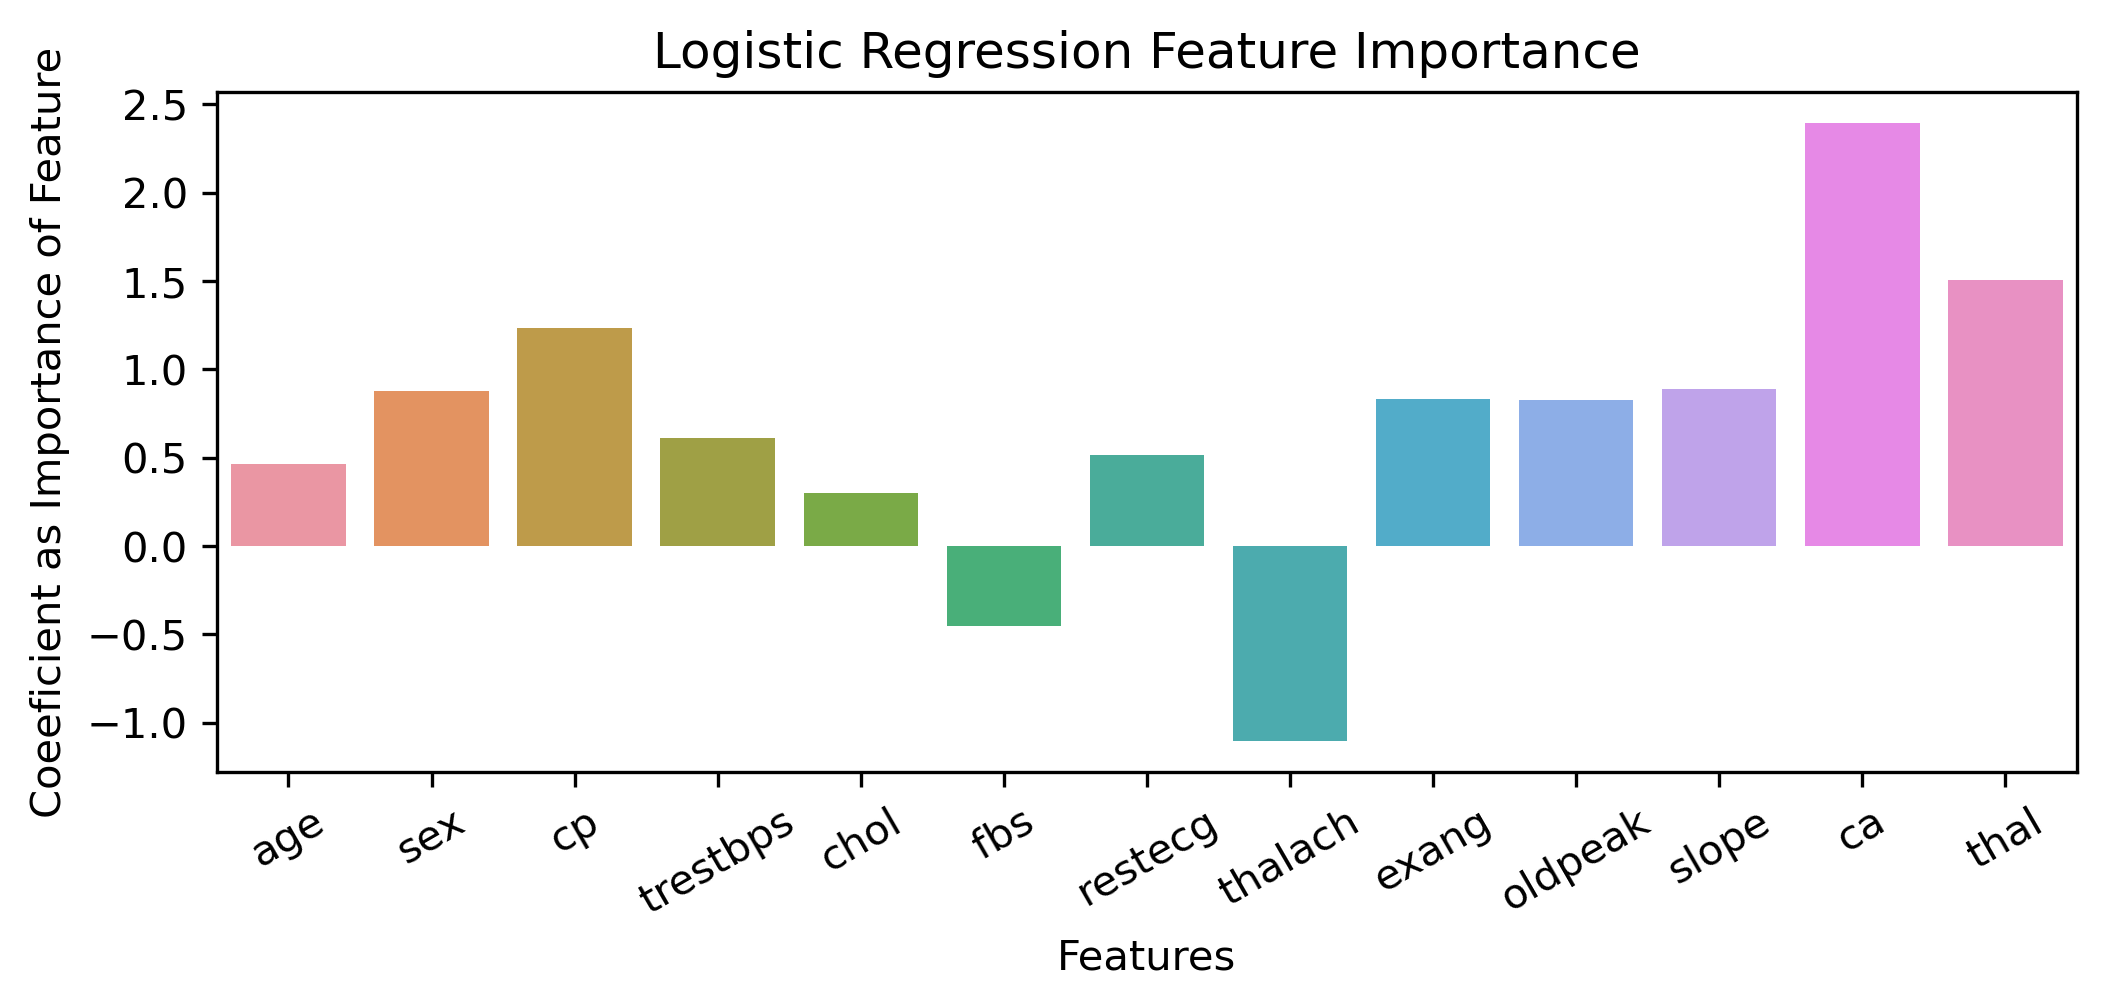

In [56]:
feature_importance = traditional_feature_importance(logistic_regression, x_train, figsize=(8, 3), title="Logistic Regression Feature Importance")

Logistic Regression outputs the log odds of $Y = 1$. This means that to extract the actual coeffients we need to apply exponetial to the coefficient we got. 



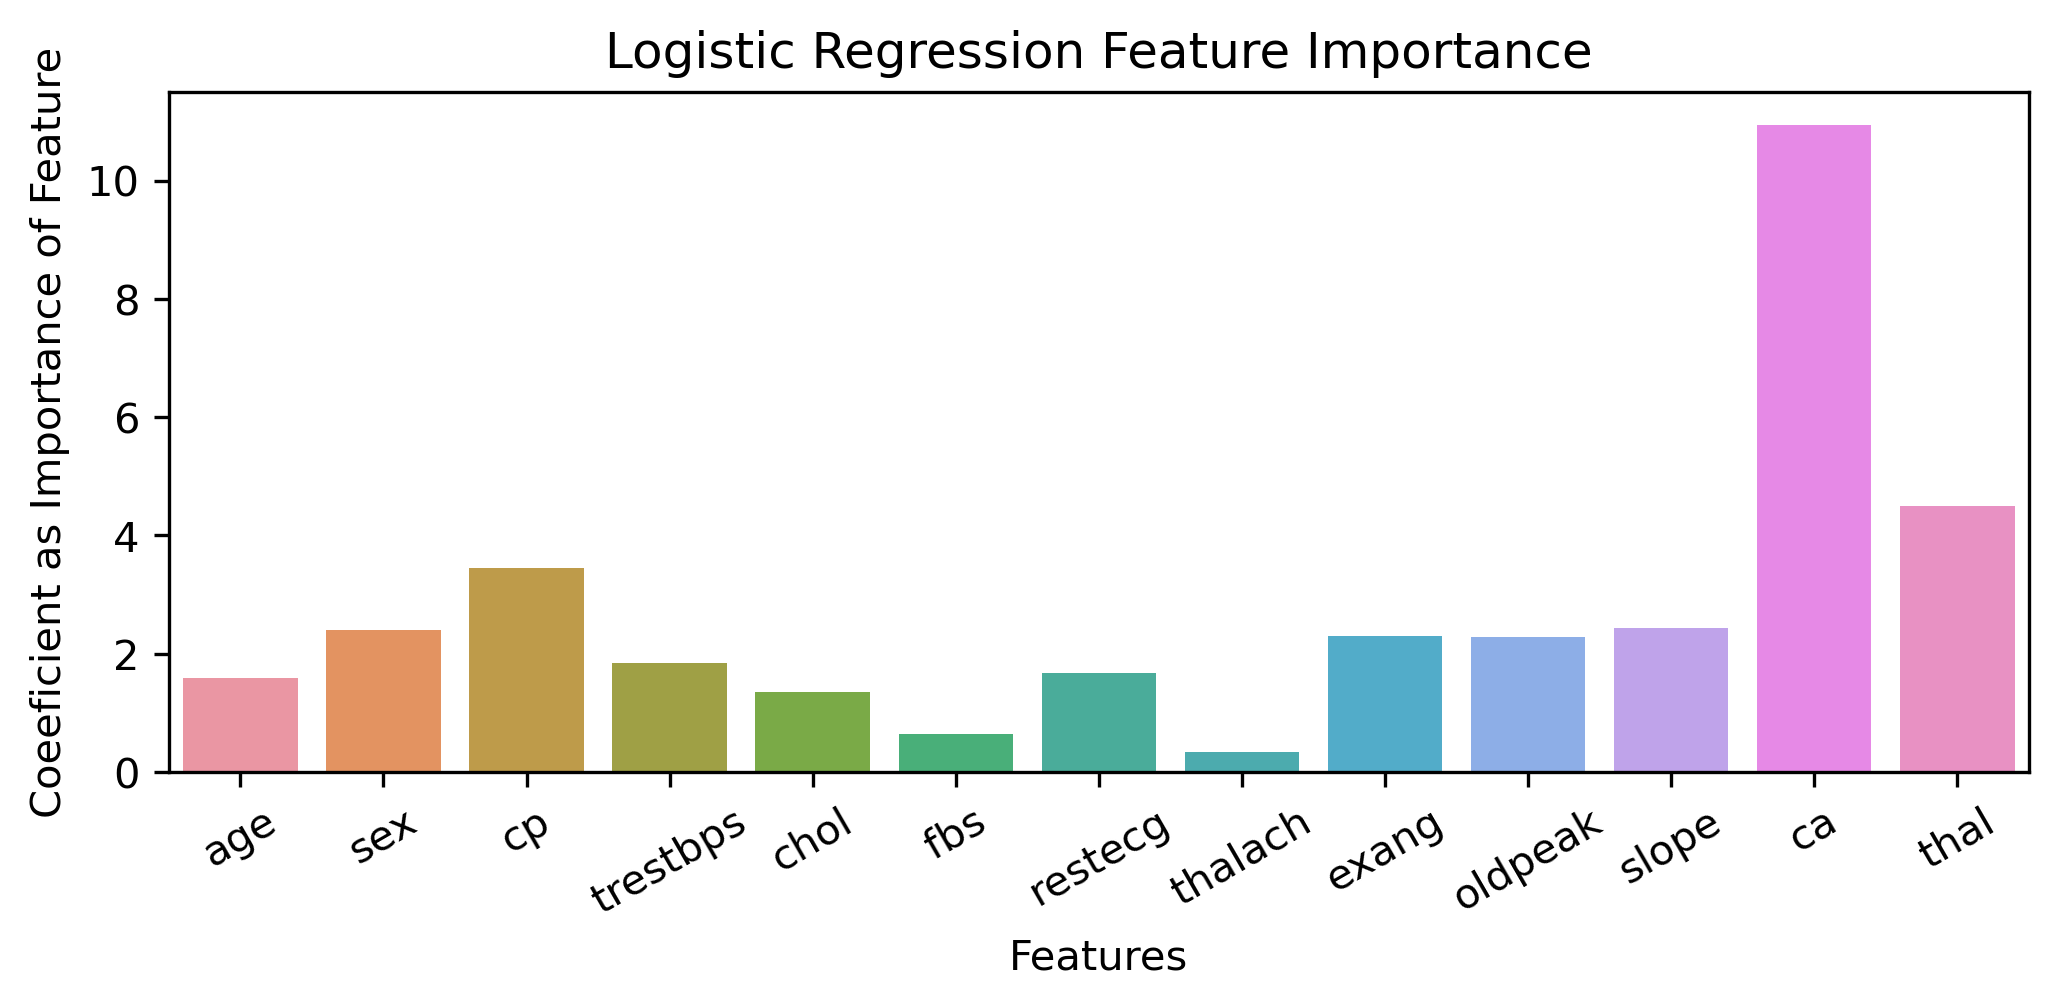

In [57]:
feature_importance = traditional_feature_importance(logistic_regression, x_train, apply_ln=True, figsize=(8, 3), title="Logistic Regression Feature Importance")

##### Build the `IMPROVED` neural network model on the train data.

In [58]:
ann = MLPClassifier(
    hidden_layer_sizes=(16, 32, 32, 128),
    activation='relu',
    solver='adam',
    alpha=0.0,
    batch_size=32,
    learning_rate_init=0.0001,
    n_iter_no_change=10,
    random_state=10
)
ann.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.0, batch_size=32, hidden_layer_sizes=(16, 32, 32, 128),
              learning_rate_init=0.0001, random_state=10)

In [59]:
train_mean_acc = ann.score(x_train, y_train, sample_weight=None)
test_mean_acc = ann.score(x_test, y_test, sample_weight=None)

In [60]:
styled_print("Performance of Baseline Artificial Neural Network Model", header=True)
styled_print(f"The train Mean Accuracy for Artificial Neural Network is {train_mean_acc}")
styled_print(f"The test Mean Accuracy for Artificial Neural Network is {test_mean_acc}")

› Performance of Baseline Artificial Neural Network Model
    The train Mean Accuracy for Artificial Neural Network is 0.8565400843881856
    The test Mean Accuracy for Artificial Neural Network is 0.85


In [61]:
y_train_pred = ann.predict(x_train)
y_test_pred = ann.predict(x_test)

In [62]:
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

In [63]:
styled_print("Performance of Baseline Artificial Neural Network Model", header=True)
styled_print(f"The train Mean Absolute Error for Artificial Neural Network is {train_mae}")
styled_print(f"The test Mean Absolute Error for Artificial Neural Network is {test_mae}")

› Performance of Baseline Artificial Neural Network Model
    The train Mean Absolute Error for Artificial Neural Network is 0.14345991561181434
    The test Mean Absolute Error for Artificial Neural Network is 0.15


In [64]:
target_names = ['No Heart Disease', 'Heart Disease']
y_train_pred = ann.predict(x_train)
print(classification_report(y_train, y_train_pred, target_names=target_names))

                  precision    recall  f1-score   support

No Heart Disease       0.85      0.90      0.87       128
   Heart Disease       0.87      0.81      0.84       109

        accuracy                           0.86       237
       macro avg       0.86      0.85      0.85       237
    weighted avg       0.86      0.86      0.86       237



In [65]:
y_test_pred = ann.predict(x_test)
print(classification_report(y_test, y_test_pred, target_names=target_names))

                  precision    recall  f1-score   support

No Heart Disease       0.83      0.91      0.87        32
   Heart Disease       0.88      0.79      0.83        28

        accuracy                           0.85        60
       macro avg       0.85      0.85      0.85        60
    weighted avg       0.85      0.85      0.85        60



As we can see that the neural network model is able to beat the performance of Logistic Regression. These results are not overfitting because the performance on training and testing set is very close. 

### Section B - Unsupervised Machine Learning

In [66]:
og_data_df = cleveland_df.copy()
og_data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [67]:
og_data_df = og_data_df.dropna()
og_data_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [68]:
data_df = og_data_df.drop(target_column[0], axis=1)

In [70]:
kmeans = KMeans(n_clusters=5, random_state=0, init='random', n_init='auto').fit(data_df)
cluster_map = create_cluster_map(og_data_df, kmeans)

styled_print(f"Cluster Map from Kmeans with Random Cluster Initialization", header=True)
print(cluster_map.head(10))

styled_print(f"Cluster Centroid from Kmeans with Random Cluster Initialization", header=True)
print(get_centroid(og_data_df.drop(target_column[0], axis=1), kmeans).head(10))

› Cluster Map from Kmeans with Random Cluster Initialization
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   

   slope   ca  thal  target  ClusterID  
0    3.0  0.0   6.0     0.0        0.0  
1    2.0 

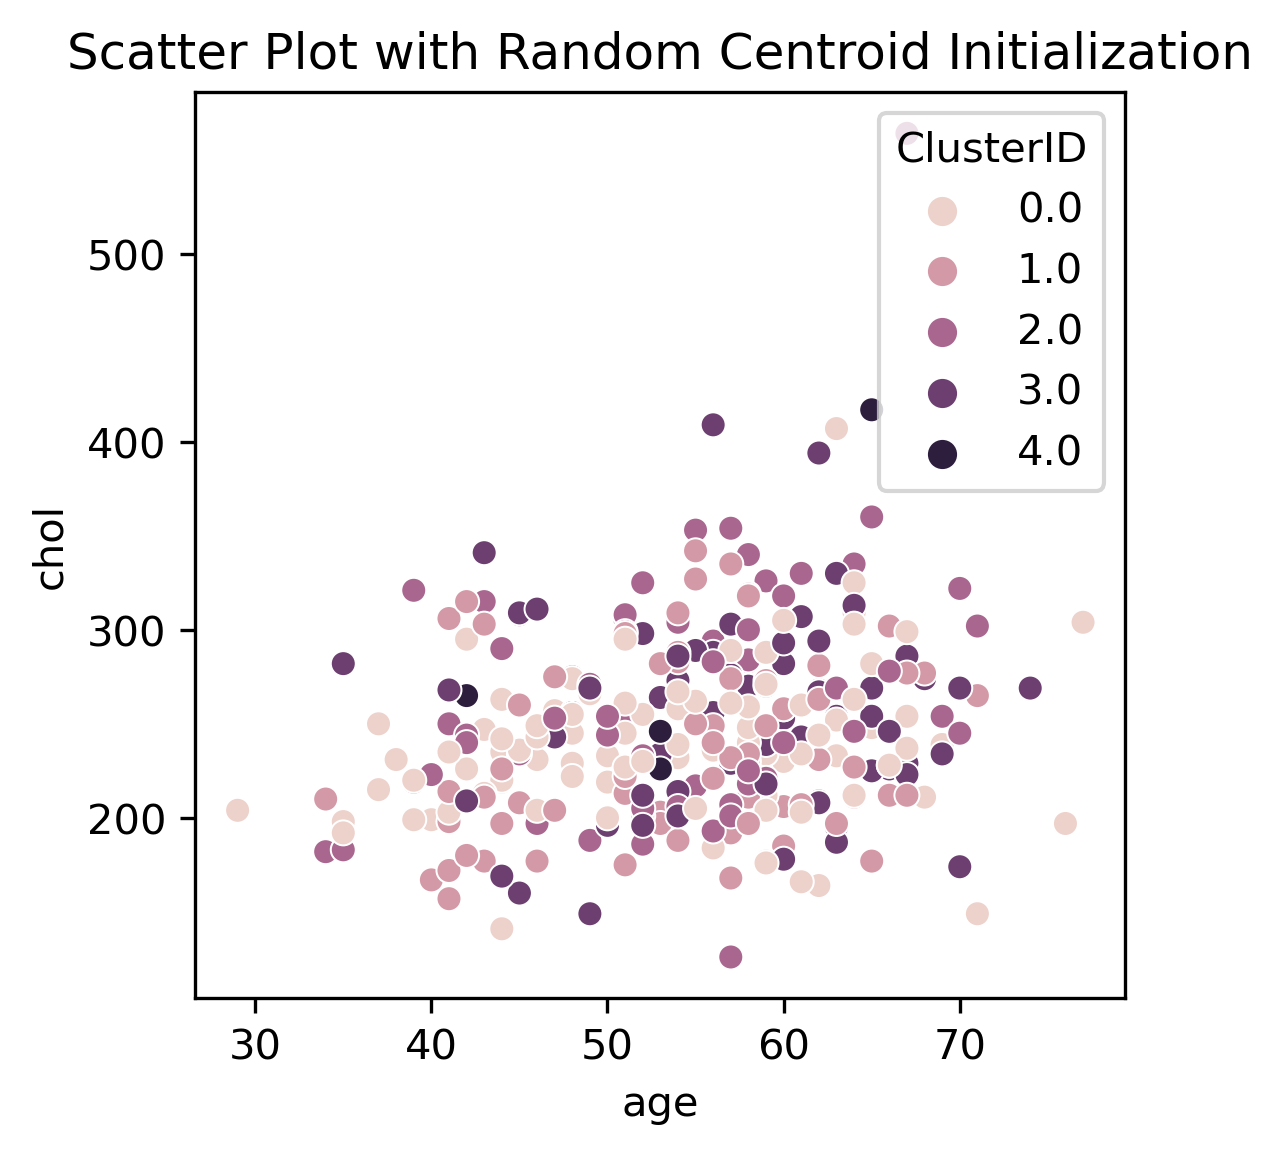

In [71]:
plot_scatter_plot(
    df=cluster_map, 
    x="age", 
    y="chol", 
    hue='ClusterID',
    title="Scatter Plot with Random Centroid Initialization", 
    figsize=(4, 4), 
    dpi=300)

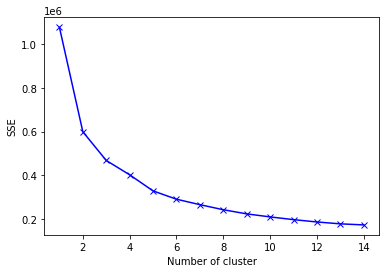

In [72]:
sse = {} 
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=0, init='random', n_init='auto').fit(data_df)
    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

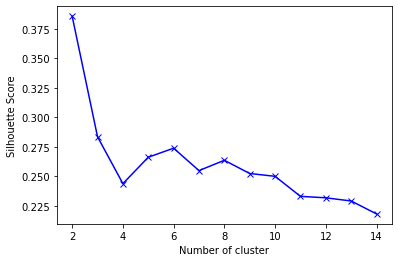

In [73]:
sc = {} 
for k in range(2, 15):
    kmeans = KMeans(n_init='auto', n_clusters=k, init='random', random_state=0).fit(data_df)
    labels = kmeans.predict(data_df)
    sc[k] = silhouette_score(data_df, labels)

# Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [79]:
kmeans = KMeans(n_clusters=2, random_state=0, init='random', n_init='auto').fit(data_df)
cluster_map = create_cluster_map(og_data_df, kmeans)

styled_print(f"Cluster Map from Kmeans with Random Cluster Initialization", header=True)
print(cluster_map.head(10))

styled_print(f"Cluster Centroid from Kmeans with Random Cluster Initialization", header=True)
print(get_centroid(og_data_df.drop(target_column[0], axis=1), kmeans).head(10))

› Cluster Map from Kmeans with Random Cluster Initialization
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6  62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7  57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8  63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9  53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   

   slope   ca  thal  target  ClusterID  
0    3.0  0.0   6.0     0.0        0.0  
1    2.0 

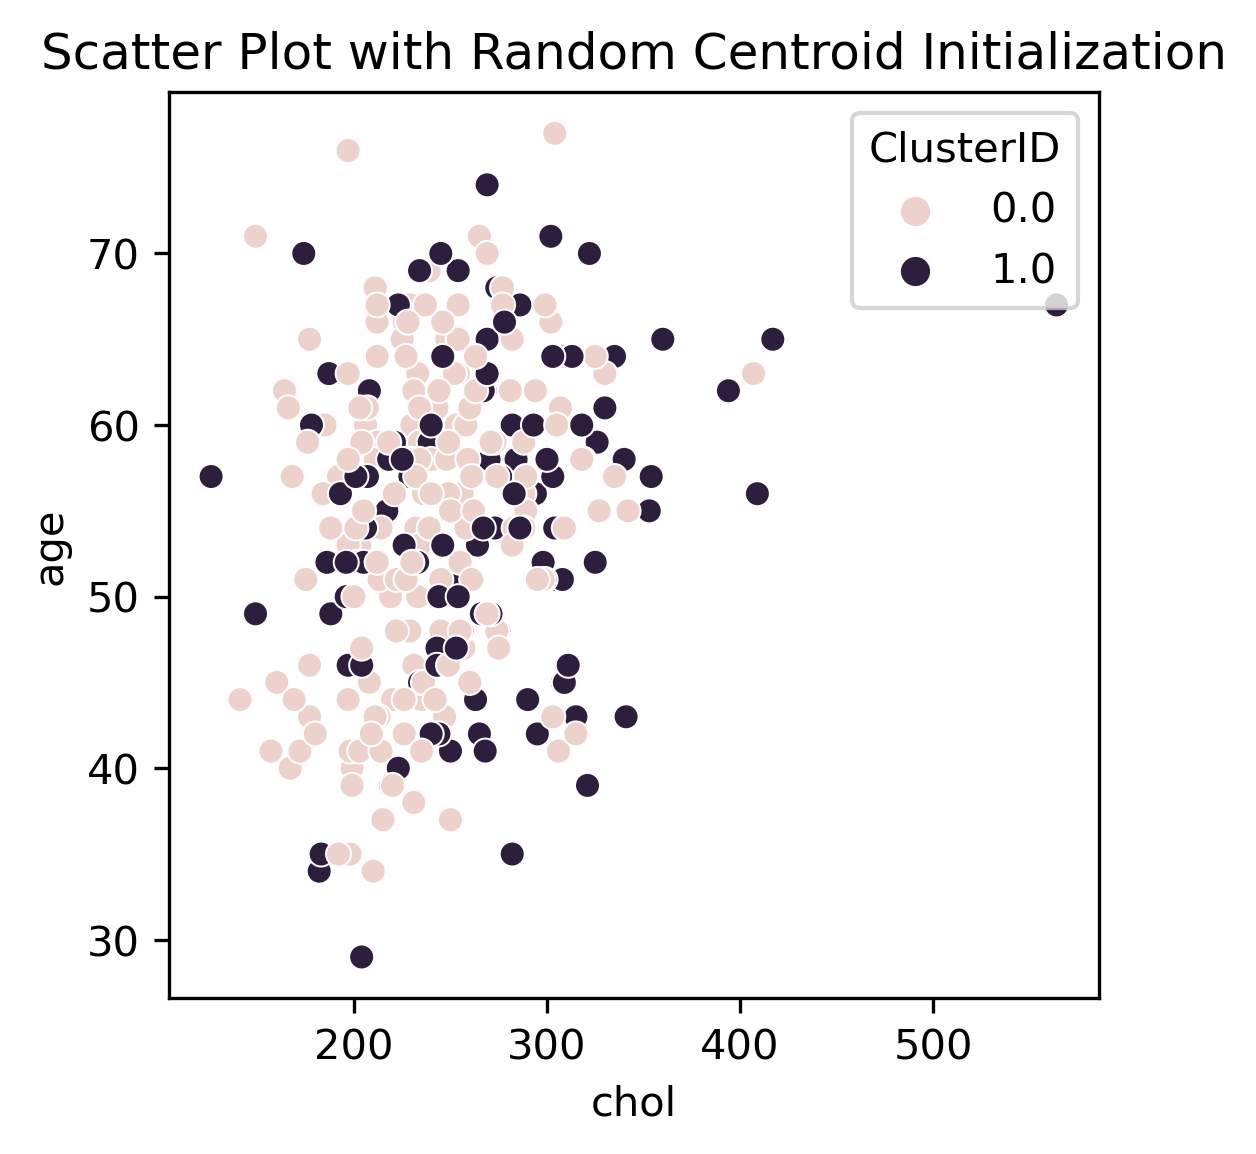

In [80]:
plot_scatter_plot(
    df=cluster_map, 
    x="chol", 
    y="age", 
    hue='ClusterID',
    title="Scatter Plot with Random Centroid Initialization", 
    figsize=(4, 4), 
    dpi=300)